## Jupyter-notebook for the data analysis of the muon properties experiment:

## Analysis of pulse heights

This notbook contains the complete code for comparing the pulse heights of the four detector layers 
of the experimental setup in the advanced laboratory course (F-Praktikum).

The assumed data format is a file in the CSV-style. Such a file should have been produced with the help of the `spectrum_setup.yaml` configuration file.
Idealy, the criteria were choosen in a way that as many muons as possible are recorded, provided that they create pulses in all layers.

The method for comparing the pulse heights uses the trimmed mean recommended in the experimental instructions.
One such implementation is available in the *scipy.stats.trim_mean* package.

### Comparing the pulse heights

This notebook is complete and should be used after the initial calibration of the setup is performed.
The data used here are the ones with a single muon signal.

### 1. Import of all necessary packages

In [15]:
import numpy as np     
import pandas as pd                 # Powerful package for the handling of large datasets
import matplotlib.pyplot as plt     # Graphics library

### 2. Read in of the data

In [20]:
ph_file = "//home/shivamkumar/Documents/KIT COURSES/Lab/Exp1/sam/muon_properties/analysis/efficiency.txt"   # data in csv-Format produced with config `lifetime_setup.yaml`

# convenient abbreviations for column names
# - for measurements with 3 panels
dp_columns_3p = { 0:'EvId',  1:'EvT', 2:'tDead', 
               3: 'h1A',  4:'p1A', 5: 'I1A',
               6: 'h1B',  7:'p1B', 8: 'I1B', 
               9: 'h1C', 10:'p1C', 11:'I1C'
                }
# - for measurements with 4 panels
dp_columns_4p = { 0:'EvId',  1:'EvT', 2:'tDead', 
               3: 'h1A',  4:'p1A', 5: 'I1A',
               6: 'h1B',  7:'p1B', 8: 'I1B', 
               9: 'h1C', 10:'p1C', 11:'I1C',
               12: 'h1D', 13:'p1D', 14:'I1D'
                }

# read the data and store in a pandas dataframe
ph_df = pd.read_csv( ph_file, 
     skiprows=1, comment='#', delimiter='\t', header=None).rename(columns = dp_columns_4p) 

print("** {:d} rows read from file {:s}".format(len(ph_df['EvId']), ph_file ) )

** 1155 rows read from file //home/shivamkumar/Documents/KIT COURSES/Lab/Exp1/sam/muon_properties/analysis/efficiency.txt


### 3. Quality information regarding the recorded data
First off, it is recommended to survey the quality of the data:

   - Statistical information regarding the data taking
   - Temporal progression of the recorded data

** Infomation on lifetime data:
  Date of 1st Event:  Mon Mar 20 16:45:59 2023
  Date of last Event:                           Mon Mar 20 16:46:37 2023
     triggered Events: 1204  selected Pulses: 1155  Duration: 38.09447884559631s  Rate: 31.6Hz
     mean time between selected pulses: 3.3e-08s


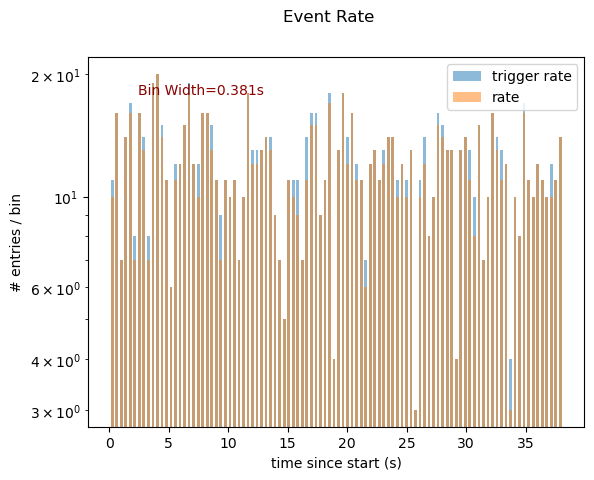

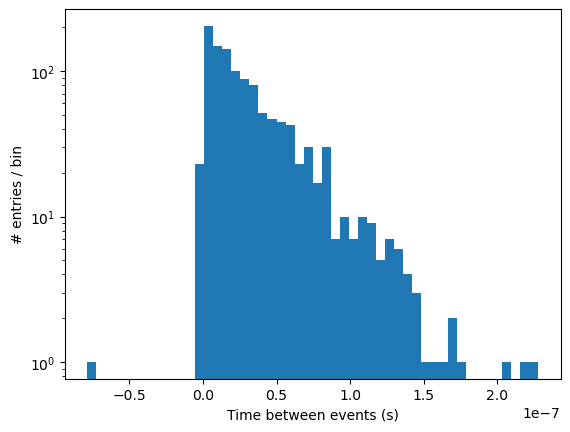

In [21]:
import time

# print information  on data (from header)
header = ph_df[['EvT','EvId', 'tDead']]

# event times in seconds 
time_unit= 1e-6  # adjust if time is in µs
EvT_s = header['EvT']*time_unit  # event times in s 

print('** Infomation on lifetime data:')
print('  Date of 1st Event: ', time.ctime(EvT_s.values[0]))
print('  Date of last Event:', 25*' ', time.ctime(EvT_s.values[-1]))

NEvents = header['EvId'].values[-1]
Nsel = len(header['EvId'])
Duration = (EvT_s.values[-1] - EvT_s.values[0])
print('     triggered Events: {}  selected Pulses: {}  Duration: {}s  Rate: {:.1f}Hz'.format(
    NEvents, Nsel, Duration, NEvents/Duration))
Tbetween = np.diff(EvT_s.to_numpy())*1e-6  # in seconds
print('     mean time between selected pulses: {:.2g}s'.format(Tbetween.mean()))

T0 = EvT_s[0]
#  -  number of events triggered between selected events in data set
dN = np.diff(header['EvId'].to_numpy())
Nbins= 100
Wbin = Duration/Nbins
_ = plt.hist(EvT_s[1:] - T0, weights = dN, bins=Nbins, rwidth=0.6, label='trigger rate', alpha=0.5)
_ = plt.hist(EvT_s[1:] - T0, bins=Nbins, rwidth=0.6, label='rate', alpha=0.5, )
plt.text(0.1, 0.9, "Bin Width={:.3g}s".format(Wbin), color = 'darkred', transform=plt.gca().transAxes)
plt.yscale('log')
plt.suptitle('Event Rate')
plt.xlabel('time since start (s)')
plt.ylabel('# entries / bin')
plt.legend(loc='upper right')
plt.show()

# plot time between events                                
_ = plt.hist(Tbetween[Tbetween < Tbetween.mean()*100], bins=50, log=True)
plt.xlabel('Time between events (s)')
plt.ylabel('# entries / bin')
plt.show()

## Analysis of pulse height distribution

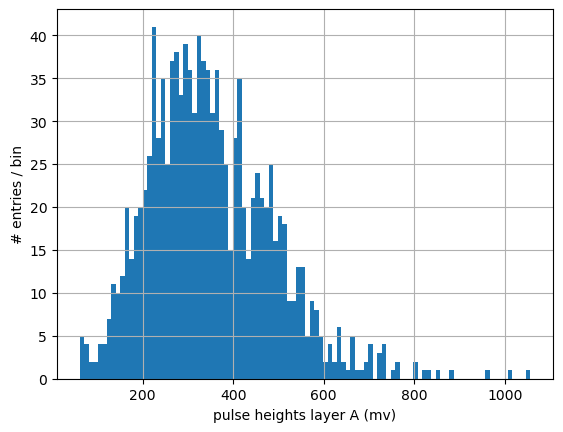

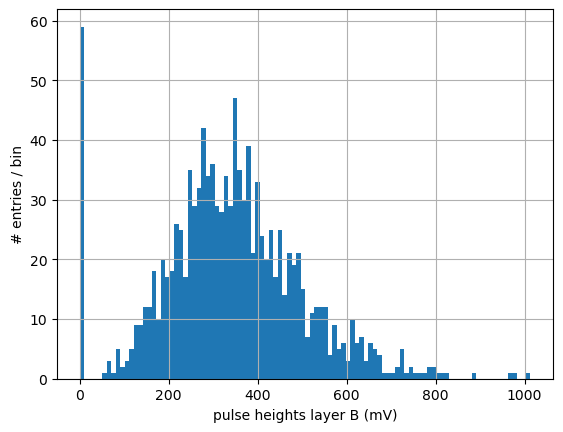

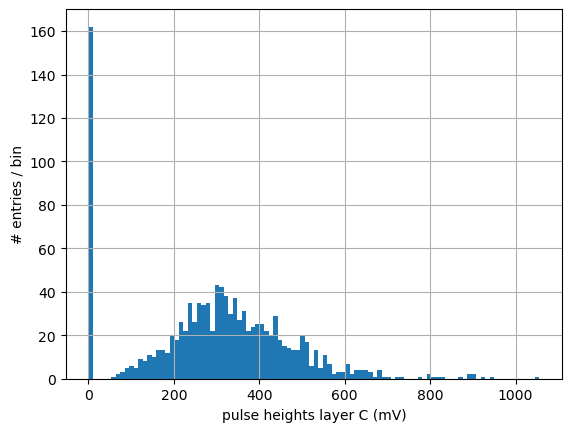

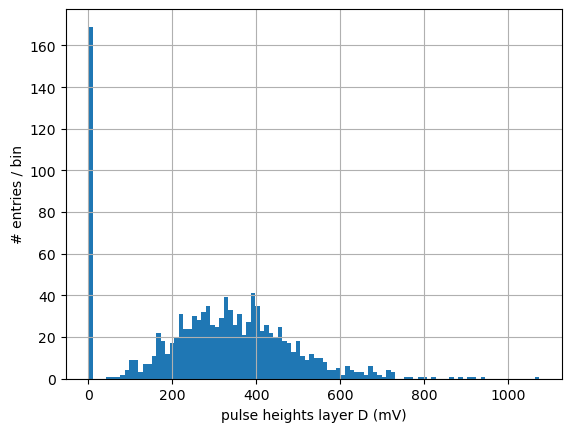

** trimmed means of pulse-heihts:
  - ch A:341 mV
  - ch B:350 mV
  - ch C:338 mV
  - ch C:346 mV
** ratios wrt. channel A:
  - ch A/B: 0.976 
  - ch A/C: 1.01 
  - ch A/D: 0.986 


In [22]:
# import method to calculate trimmed mean 
from scipy.stats import trim_mean   

# show pulse height distributions
ph_df['h1A'].hist(bins=100, log=False)
plt.xlabel('pulse heights layer A (mv)')
plt.ylabel('# entries / bin')
plt.show()
ph_df['h1B'].hist(bins=100, log=False)
plt.xlabel('pulse heights layer B (mV)')
plt.ylabel('# entries / bin')
plt.show()
ph_df['h1C'].hist(bins=100, log=False)
plt.xlabel('pulse heights layer C (mV)')
plt.ylabel('# entries / bin')
plt.show()
ph_df['h1D'].hist(bins=100, log=False)
plt.xlabel('pulse heights layer D (mV)')
plt.ylabel('# entries / bin')
plt.show()

# retrieve and print relevant statistical information
th = 10     # set threshold to remove entries at 0 pulse height
frac = 0.1  # fraction for trimmed mean
# tmean_h1A = trim_mean(ph_df[]   ['h1A'], frac)
tmean_h1A = trim_mean(ph_df['h1A'][ph_df['h1A']>th], frac)
tmean_h1B = trim_mean(ph_df['h1B'][ph_df['h1B']>th], frac)
tmean_h1C = trim_mean(ph_df['h1C'][ph_df['h1C']>th], frac)
tmean_h1D = trim_mean(ph_df['h1D'][ph_df['h1D']>th], frac)

print("** trimmed means of pulse-heihts:")
print("  - ch A:{:.3g} mV".format(tmean_h1A))
print("  - ch B:{:.3g} mV".format(tmean_h1B))
print("  - ch C:{:.3g} mV".format(tmean_h1C))
print("  - ch C:{:.3g} mV".format(tmean_h1D))

# calculation of scale factors 
sfA = 1. 
sfB = tmean_h1A/tmean_h1B
sfC = tmean_h1A/tmean_h1C
sfD = tmean_h1A/tmean_h1D
print("** ratios wrt. channel A:")
print("  - ch A/B: {:.3g} ".format(sfB))
print("  - ch A/C: {:.3g} ".format(sfC))
print("  - ch A/D: {:.3g} ".format(sfD))

*Note*: The scaling factors determined here should be used immideatly for the data taking of the next measurements. 
This way, the scaling can be applied to the real time selection of the raw data for the dual pulses. 
The *yaml*-files for the configuration contain the necessary options for this purpose.

## Determination of panel efficiencies

The detection efficiencies of individual detector layers can be determined from the counts of events for which a muon passage is assured. 
One way to do this is by requiring a coincidence with multiple other layers.
The resulting efficiency is determined by the fraction of events in which the observed layer was triggered ("Tag-and-probe method")

**Caution**: This method does not work for the detector layer that the oscilloscope has been triggered on, as the trigger condition and the measured pulse height are not independent of each other.

First, corrected values of pulse heights should be generated using the scaling factors determined above.

For this, minimal pulse height values need to be defined for each layer. 
Afterward, the corresponding counts can be determined efficiently by using Boolean arrays.

In [23]:
# correct pulse heights
phA = ph_df['h1A']
phB = ph_df['h1B']*sfB
phC = ph_df['h1C']*sfC
phD = ph_df['h1D']*sfD

# define pulse height thresholds
th_1A = 75
th_1B = 75
th_1C = 75
th_1D = 75

# Efficiency of Panel B:
mask_B = ( ( (phA > th_1A) & (phC > th_1C) ) |
           ( (phA > th_1A) & (phD > th_1D) ) |
           ( (phC > th_1C) & (phD > th_1D) ) )
        
tag_B = np.sum(mask_B)
probe_B = np.sum(mask_B & (phB > th_1B))
print("** Effizienz Panel B: {:.3g}".format(probe_B/tag_B))

# Efficiency of Panel C:
mask_C = (    # ( (phA > th_1A) & (phB > th_1B) ) | # no stopped muons
           ( (phA > th_1A) & (phD > th_1D) ) |
           ( (phB > th_1B) & (phD > th_1D) ) )
tag_C = np.sum(mask_C)
probe_C = np.sum(mask_C & (phC > th_1C))
print("** Effizienz Panel C: {:.3g}".format(probe_C/tag_C))

# --> analogue code for D
mask_D = ( #   ( (phA > th_1A) & (phB > th_1B) ) | # no stopped muons
           ( (phA > th_1A) & (phC > th_1C) ) |
           ( (phB > th_1B) & (phC > th_1C) ) )
tag_D = np.sum(mask_D)
probe_D = np.sum(mask_D & (phD > th_1D))
print("** Effizienz Panel D: {:.3g}".format(probe_D/tag_D))


# Efficiency of Panel A:
# !!! Requires new data taking with the oscilloscope triggering on e.g. layer B !
# --> the Code is very similar !
              

** Effizienz Panel B: 0.941
** Effizienz Panel C: 0.952
** Effizienz Panel D: 0.945
